# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to check these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Challenge Deliverable 1. Generate a Ride-Sharing DataFrame by City Type

In [3]:
#  1. Get the total rides for each city type

# Create dataframe for each city type.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == 'Urban']

suburban_cities_df = pyber_data_df[pyber_data_df["type"] == 'Suburban']

rural_cities_df = pyber_data_df[pyber_data_df["type"] == 'Rural']

# Extrapolate total number of rides in each city type
urban_ride_count = urban_cities_df.count()["ride_id"]
print(f"The total number of rides in urban cities is {urban_ride_count}.")

suburban_ride_count = suburban_cities_df.count()["ride_id"]
print(f"The total number of rides in suburban cities is {suburban_ride_count}.")

rural_ride_count = rural_cities_df.count()["ride_id"]
print(f"The total number of rides in rural cities is {rural_ride_count}.")

# Alternative method of coding
sum_rides_by_type = pyber_data_df.groupby(['type']).count()['ride_id']
sum_rides_by_type

The total number of rides in urban cities is 1625.
The total number of rides in suburban cities is 625.
The total number of rides in rural cities is 125.


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type

urban_driver_count = urban_cities_df.count()["driver_count"]
print(f"The total number of drivers in urban cities is {urban_driver_count}.")

suburban_driver_count = suburban_cities_df.sum()["driver_count"]
print(f"The total number of drivers in suburban cities is {suburban_driver_count}.")

rural_driver_count = rural_cities_df.sum()["driver_count"]
print(f"The total number of drivers in rural cities is {rural_driver_count}.")

# Alternative method of coding
sum_drivers_by_type = pyber_data_df.groupby(['type']).count()['driver_count']
sum_drivers_by_type

The total number of drivers in urban cities is 1625.
The total number of drivers in suburban cities is 8570.
The total number of drivers in rural cities is 537.


type
Rural        125
Suburban     625
Urban       1625
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type

urban_fare_total = urban_cities_df.sum()["fare"]
print(f"The total revenue from fares in urban cities is ${urban_fare_total:.2f}.")

suburban_fare_total = suburban_cities_df.sum()["fare"]
print(f"The total revenue from fares in suburban cities is ${suburban_fare_total:.2f}.")

rural_fare_total = rural_cities_df.sum()["fare"]
print(f"The total revenue from fares in rural cities is ${rural_fare_total:.2f}.")

# Alternative method of coding
sum_revenue_by_type = pyber_data_df.groupby(['type']).sum()['fare']
sum_revenue_by_type

The total revenue from fares in urban cities is $39854.38.
The total revenue from fares in suburban cities is $19356.33.
The total revenue from fares in rural cities is $4327.93.


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 

urban_average_fare = urban_cities_df.mean()["fare"]
print(f"The average fare per ride in urban cities is ${urban_average_fare:.2f}.")

suburban_average_fare = suburban_cities_df.mean()["fare"]
print(f"The average fare per ride in suburban cities is ${suburban_average_fare:.2f}.")

rural_average_fare = rural_cities_df.mean()["fare"]
print(f"The average fare per ride in rural cities is ${rural_average_fare:.2f}.")

# Alternative method of coding
average_fare_per_ride = pyber_data_df.groupby(['type']).mean()['fare']
average_fare_per_ride

The average fare per ride in urban cities is $24.53.
The average fare per ride in suburban cities is $30.97.
The average fare per ride in rural cities is $34.62.


C:\Users\Mark\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Mark\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
C:\Users\Mark\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if __name__ == "__main

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
urban_average_driver_fare = urban_fare_total / urban_driver_count
print(f"The average fare per driver in urban cities is ${urban_average_driver_fare:.2f}.")

suburban_average_driver_fare = suburban_fare_total / suburban_driver_count
print(f"The average fare per driver in suburban cities is ${suburban_average_driver_fare:.2f}.")

rural_average_driver_fare = rural_fare_total / rural_driver_count
print(f"The average fare per driver in rural cities is ${rural_average_driver_fare:.2f}.")

# Alternative method of coding
average_fare_per_driver = sum_revenue_by_type / sum_drivers_by_type
average_fare_per_driver

The average fare per driver in urban cities is $24.53.
The average fare per driver in suburban cities is $2.26.
The average fare per driver in rural cities is $8.06.


type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 

pyber_summary_df = pd.DataFrame({"Total Rides": sum_rides_by_type, "Total Drivers": sum_drivers_by_type, 
                                 "Total Fares": sum_revenue_by_type, "Average Fare per Ride": average_fare_per_ride, 
                                 "Average Fare per Driver": average_fare_per_driver})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,125,4327.93,34.623440,34.623440
Suburban,625,625,19356.33,30.970128,30.970128
Urban,1625,1625,39854.38,24.525772,24.525772


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,125,4327.93,34.623440,34.623440
Suburban,625,625,19356.33,30.970128,30.970128
Urban,1625,1625,39854.38,24.525772,24.525772


In [10]:
#  8. Format the columns.

pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,125,$4327.93,$34.62,$34.62
Suburban,625,625,$19356.33,$30.97,$30.97
Urban,"1,625","1,625",$39854.38,$24.53,$24.53


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# Print the merged DataFrame for reference.

pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [16]:
# 1. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

sum_fares_by_type = pyber_data_df.groupby(['type', 'date']).sum()['fare']
sum_fares_by_type

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [18]:
# 2. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()

sum_fares_by_type = sum_fares_by_type.reset_index()
sum_fares_by_type.head()

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33


In [20]:
# 3. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

sum_fares_by_type_pivot=sum_fares_by_type.pivot_table(['fare'], index = ['date'], columns=['type'])
sum_fares_by_type_pivot.head()

fare                
type                Rural Suburban  Urban
date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75

In [21]:
# 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-28'.

fares_Jan_April = sum_fares_by_type.pivot_table(['fare'], index = ['date'], columns=['type']).loc['2019-01-01':'2019-04-28']
fares_Jan_April

fare                
type                 Rural Suburban  Urban
date                                      
2019-01-01 00:08:16    NaN      NaN  37.91
2019-01-01 00:46:46    NaN    47.74    NaN
2019-01-01 02:07:24    NaN    24.07    NaN
2019-01-01 03:46:50    NaN      NaN   7.57
2019-01-01 05:23:21    NaN      NaN  10.75
...                    ...      ...    ...
2019-04-27 17:58:27  14.01      NaN    NaN
2019-04-27 19:45:48    NaN    28.84    NaN
2019-04-27 20:41:36    NaN      NaN   8.28
2019-04-27 23:26:03    NaN      NaN  19.06
2019-04-27 23:52:44    NaN    45.98    NaN

[2177 rows x 3 columns]

In [23]:
# 5. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

fares_Jan_April.index = pd.to_datetime(fares_Jan_April.index)
fares_Jan_April  

fare                
type                 Rural Suburban  Urban
date                                      
2019-01-01 00:08:16    NaN      NaN  37.91
2019-01-01 00:46:46    NaN    47.74    NaN
2019-01-01 02:07:24    NaN    24.07    NaN
2019-01-01 03:46:50    NaN      NaN   7.57
2019-01-01 05:23:21    NaN      NaN  10.75
...                    ...      ...    ...
2019-04-27 17:58:27  14.01      NaN    NaN
2019-04-27 19:45:48    NaN    28.84    NaN
2019-04-27 20:41:36    NaN      NaN   8.28
2019-04-27 23:26:03    NaN      NaN  19.06
2019-04-27 23:52:44    NaN    45.98    NaN

[2177 rows x 3 columns]

In [24]:
# 6. Check that the datatype for the index is datetime using df.info()

fares_Jan_April.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (fare, Rural)     114 non-null    float64
 1   (fare, Suburban)  567 non-null    float64
 2   (fare, Urban)     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [25]:
# 7. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

weekly_fares_df = fares_Jan_April.resample('W').sum()
weekly_fares_df.head()

fare                  
type         Rural Suburban    Urban
date                                
2019-01-06  187.92   721.60  1661.68
2019-01-13   67.65  1105.13  2050.43
2019-01-20  306.00  1218.20  1939.02
2019-01-27  179.69  1203.28  2129.51
2019-02-03  333.08  1042.79  2086.94

<function matplotlib.pyplot.show(close=None, block=None)>

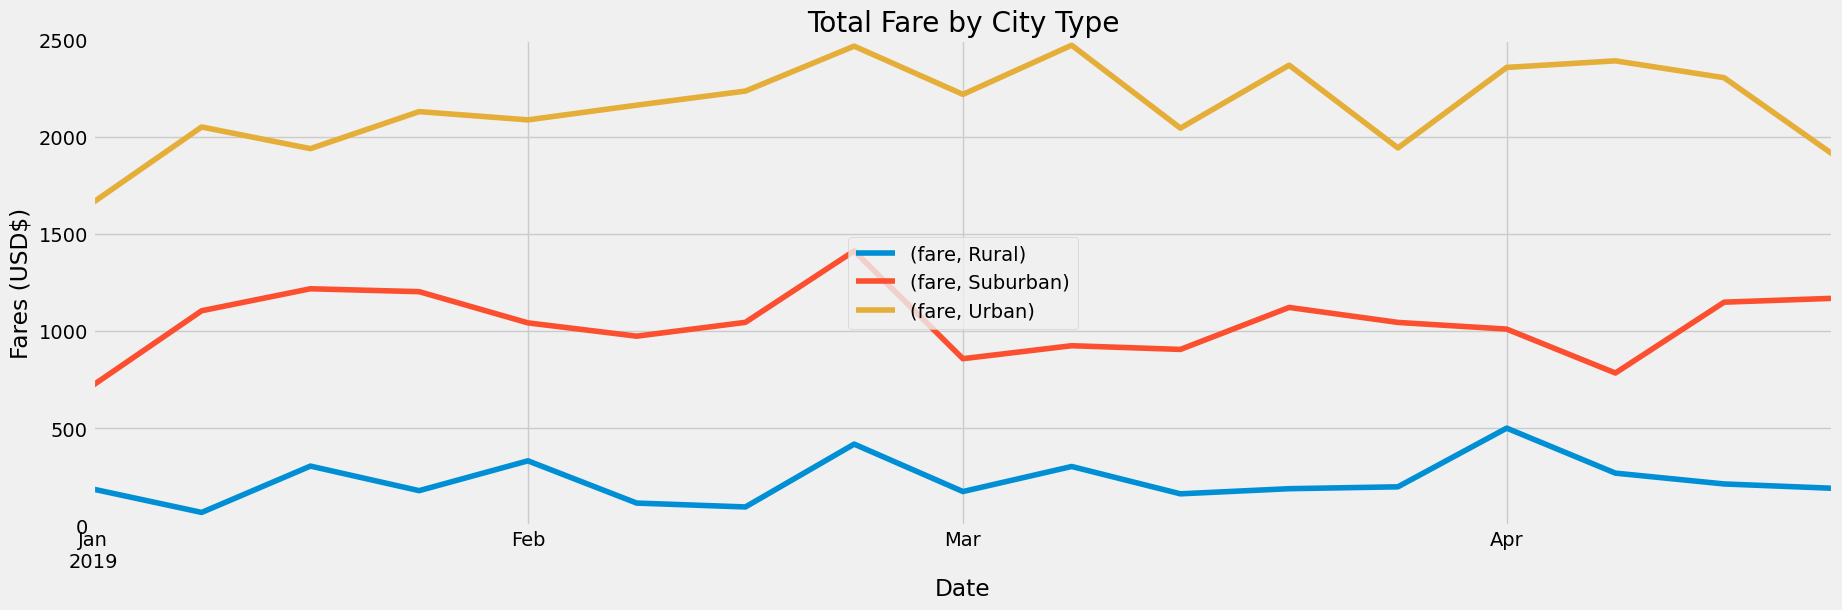

In [53]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Create the plot with ax.plt() and increase graph size
ax = weekly_fares_df.plot(figsize = (20,6))
ax.set_ylim(0, 2500)

# Create labels for the x and y axes.
ax.set_ylabel("Fares (USD$)")
ax.set_xlabel("Date")

# Create a title.
ax.set_title("Total Fare by City Type")

# Add a legend and reposition it
ax.legend("City Types")
ax.legend(loc='center')

# Save figure
plt.savefig("analysis/fig1")

# Show the graph
plt.show
